In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
from datetime import datetime

from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [2]:
#Split normal density
def split_normal_density(x, mode, sigma1, sigma2):

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)
    
    mark = (x > mode)

    f = C * np.exp(-1/(2*sigma1**2)*(x - mode)**2)

    f[mark] = C * np.exp(-1/(2*sigma2**2)*(x[mark] - mode)**2)

    return f

# Split normal cdf
def p_split_normal(x, mode, sigma, skew):

    sigma1 = math.sqrt(sigma/(1 + skew))
    sigma2 = math.sqrt(sigma/(1 - skew))

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)

    k = x

    mark = (k > mode)

    if np.isscalar(k):
        true = (1 - C * math.sqrt(2 * math.pi) * sigma2 * (1 - sp.stats.norm.cdf((k - mode)/sigma2)))
    
        false = (C * math.sqrt(2 * math.pi) * sigma1 * sp.stats.norm.cdf((k - mode)/sigma1))
    
        p = true if mark else false
    else:
        p = (C * math.sqrt(2 * math.pi) * sigma1 * sp.stats.norm.cdf((k - mode)/sigma1))

        p[mark] = (1 - C * math.sqrt(2 * math.pi) * sigma2 * (1 - sp.stats.norm.cdf((k[mark] - mode)/sigma2)))

    return p

# Split normal quantile
def q_split_normal(alpha, mode, sigma, skew):
    sigma1 = math.sqrt(sigma/(1 + skew))
    sigma2 = math.sqrt(sigma/(1 - skew))

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)

    p = p_split_normal(mode, mode, sigma, skew) 

    mark = alpha > p

    q = (mode + sigma1 * sp.stats.norm.ppf( alpha/(C * math.sqrt(2 * math.pi) * sigma1)))

    q[mark] = (mode + sigma2 * sp.stats.norm.ppf((alpha[mark] + C * math.sqrt(2 * math.pi) * sigma2 - 1)/(C * math.sqrt(2 * math.pi) * sigma2)))
    
    return q

# Split normal random number
def r_split_normal(n, mode, sigma, skew):

    u = np.random.uniform(size=n)

    r = q_split_normal(n, mode, sigma, skew)

    return r



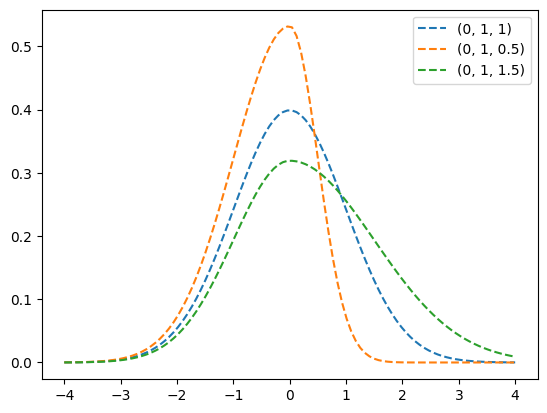

In [3]:
params_list = [[0, 1, 1, "(0, 1, 1)"], [0, 1, 0.5, "(0, 1, 0.5)"], [0, 1, 1.5, "(0, 1, 1.5)"]]

x = np.linspace(-4, 4, 100)

for params in params_list:
    mu, sigma1, sigma2, lab = params
    y = split_normal_density(x, mu, sigma1, sigma2)
    plt.plot(x, y, '--', label = lab)
plt.legend()
plt.show()

In [4]:
boe = pd.read_csv("boe.csv")
cpi = pd.read_csv("cpi.csv")
boe["time"] = pd.to_datetime(boe["time"], format="%d/%m/%Y")
boe["quarter"] = pd.PeriodIndex(boe.time, freq='Q')
boe

,time,mode,uncertainty,skew,quarter
0,2013-04-01,2.92,0.88,0,2013Q2
1,2013-07-01,3.22,1.11,0,2013Q3
2,2013-10-01,3.13,1.27,0,2013Q4
3,2014-01-01,2.95,1.34,0,2014Q1
4,2014-04-01,2.82,1.37,0,2014Q2
5,2014-07-01,2.53,1.39,0,2014Q3
6,2014-10-01,2.41,1.42,0,2014Q4
7,2015-01-01,2.32,1.48,0,2015Q1
8,2015-04-01,2.23,1.49,0,2015Q2
9,2015-07-01,2.13,1.50,0,2015Q3


In [5]:
cpi["time"] = pd.to_datetime(cpi["time"], format="%d/%m/%Y")
cpi["quarter"] = pd.PeriodIndex(cpi.time, freq='Q')
cpi

,time,cpi,quarter
0,2008-01-01,2.10,2008Q1
1,2008-04-01,2.50,2008Q2
2,2008-07-01,3.30,2008Q3
3,2008-10-01,4.70,2008Q4
4,2009-01-01,4.10,2009Q1
5,2009-04-01,3.20,2009Q2
6,2009-07-01,2.20,2009Q3
7,2009-10-01,1.60,2009Q4
8,2010-01-01,1.90,2010Q1
9,2010-04-01,3.00,2010Q2


In [11]:
time = pd.concat((boe["time"],cpi["time"]))
time

0    2013-04-01
1    2013-07-01
2    2013-10-01
3    2014-01-01
4    2014-04-01
5    2014-07-01
6    2014-10-01
7    2015-01-01
8    2015-04-01
9    2015-07-01
10   2015-10-01
11   2016-01-01
0    2008-01-01
1    2008-04-01
2    2008-07-01
3    2008-10-01
4    2009-01-01
5    2009-04-01
6    2009-07-01
7    2009-10-01
8    2010-01-01
9    2010-04-01
10   2010-07-01
11   2010-10-01
12   2011-01-01
13   2011-04-01
14   2011-07-01
15   2011-10-01
16   2012-01-01
17   2012-04-01
18   2012-07-01
19   2012-10-01
20   2013-01-01
Name: time, dtype: datetime64[ns]

In [6]:
p = np.linspace(0.05, 0.95, 19)
p = np.array([0.01] + list(p) + [0.99])

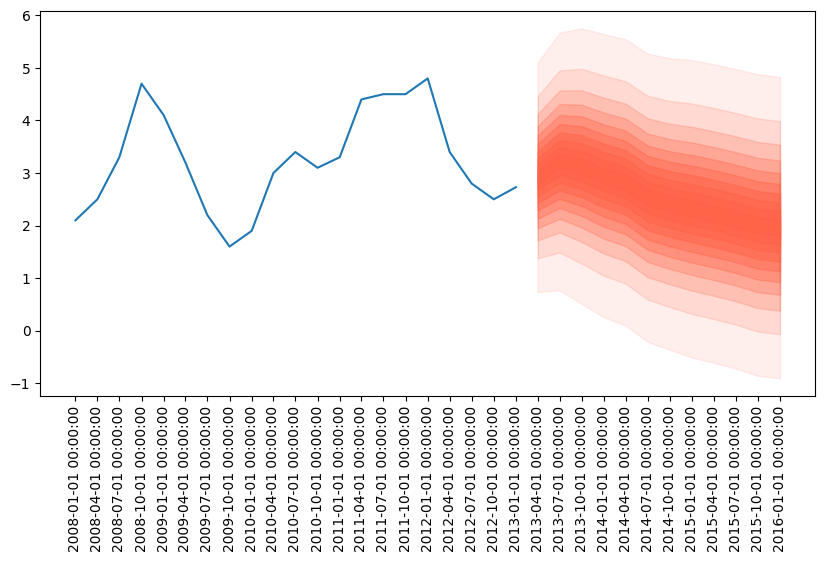

In [14]:
n = p.shape[0]
m = boe.shape[0]

cpival = np.zeros([n, m])

for i in range(0, m):
    cpival[:,i] = q_split_normal(p, mode = boe.iloc[i,1], sigma = boe.iloc[i,2], skew = boe.iloc[i,3])

#cpival.
mid = round(n/2)

col = np.linspace(0.1, 0.6, mid)

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(cpi.time,cpi.cpi)

plt.xticks(boe["time"], boe["quarter"], rotation=45)

#cpival = np.hstack((np.array([cpi.cpi.iloc[-1]]*21).reshape(21,1),cpival))

for i in range(0, mid):
    plt.fill_between(boe["time"][:], cpival[i,:], cpival[n-i-1,:], color = "tomato", alpha=col[i])

plt.xticks(time, time, rotation=90)
plt.show()